In [1]:
import pandas as pd
# Load the Excel file
file_path = r"C:\Users\prisi\Desktop\ECI 2024 LS Data.xlsx"
df = pd.read_excel(file_path)

df.head()

,S.N.,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes
0,1,Andhra Pradesh,5 - Anakapalle,C.M.RAMESH,Bharatiya Janata Party,750027.0,12042.0,762069.0,57.50
1,2,Andhra Pradesh,5 - Anakapalle,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,459762.0,5777.0,465539.0,35.13
2,3,Andhra Pradesh,5 - Anakapalle,VEGI VENKATESH,Indian National Congress,24833.0,818.0,25651.0,1.94
3,4,Andhra Pradesh,5 - Anakapalle,PALAKA SREERAMA MURTHY,Bahujan Samaj Party,19082.0,75.0,19157.0,1.45
4,5,Andhra Pradesh,5 - Anakapalle,VANKAYALA RAMACHANDRA RAO,Independent,4001.0,1.0,4002.0,0.30


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11511 entries, 0 to 11510
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   S.N.          11511 non-null  int64  
 1   State         11511 non-null  object 
 2   Constituency  11511 non-null  object 
 3   Candidate     11511 non-null  object 
 4   Party         11511 non-null  object 
 5   EVM Votes     11509 non-null  float64
 6   Postal Votes  10843 non-null  float64
 7   Total Votes   11509 non-null  float64
 8   % of Votes    11509 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 809.5+ KB


# Handling Duplicate Values

In [3]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
11506     True
11507     True
11508     True
11509     True
11510     True
Length: 11511, dtype: bool

In [4]:
# Remove duplicate rows
df = df.drop_duplicates()

# Display the DataFrame after removing duplicates
df.head()


,S.N.,State,Constituency,Candidate,Party,EVM Votes,Postal Votes,Total Votes,% of Votes
0,1,Andhra Pradesh,5 - Anakapalle,C.M.RAMESH,Bharatiya Janata Party,750027.0,12042.0,762069.0,57.50
1,2,Andhra Pradesh,5 - Anakapalle,BUDI MUTYALA NAIDU,Yuvajana Sramika Rythu Congress Party,459762.0,5777.0,465539.0,35.13
2,3,Andhra Pradesh,5 - Anakapalle,VEGI VENKATESH,Indian National Congress,24833.0,818.0,25651.0,1.94
3,4,Andhra Pradesh,5 - Anakapalle,PALAKA SREERAMA MURTHY,Bahujan Samaj Party,19082.0,75.0,19157.0,1.45
4,5,Andhra Pradesh,5 - Anakapalle,VANKAYALA RAMACHANDRA RAO,Independent,4001.0,1.0,4002.0,0.30


In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8897    False
8898    False
8899    False
8900    False
8901    False
Length: 8902, dtype: bool

# Summary statistics for numerical columns

In [6]:
df.describe()

,S.N.,EVM Votes,Postal Votes,Total Votes,% of Votes
count,8902.000000,8.901000e+03,8324.000000,8.901000e+03,8901.000000
mean,10.818243,7.208392e+04,449.844786,7.250460e+04,6.089172
std,8.252271,1.788797e+05,1380.591598,1.799072e+05,14.630761
min,1.000000,5.800000e+01,1.000000,6.100000e+01,0.010000
25%,5.000000,1.085000e+03,4.000000,1.095000e+03,0.090000
50%,9.000000,2.769000e+03,11.000000,2.781000e+03,0.240000
75%,15.000000,9.681000e+03,59.000000,9.763000e+03,0.810000
max,55.000000,1.468549e+06,19827.000000,1.471885e+06,78.540000


# Handling Missing values

In [7]:
df.isna().sum()

S.N.              0
State             0
Constituency      0
Candidate         0
Party             0
EVM Votes         1
Postal Votes    578
Total Votes       1
% of Votes        1
dtype: int64

Postal Votes= Total Votes-EVM votes (zero is not mentioned)

In [8]:
df['Postal Votes'] = df['Postal Votes'].fillna(0)

In [9]:
# Check for rows with null values in specific columns
null_rows = df[df[['EVM Votes', 'Total Votes', '% of Votes']].isnull().any(axis=1)]
print(null_rows)

     S.N.    State Constituency  \
580     1  Gujarat   24 - Surat   

                                          Candidate                   Party  \
580  MUKESHKUMAR CHANDRAKAANT DALAL ( Uncontested )  Bharatiya Janata Party   

     EVM Votes  Postal Votes  Total Votes  % of Votes  
580        NaN           0.0          NaN         NaN  


In [10]:
# Replace NaN with 0 in specific columns
columns_to_replace = ['EVM Votes', 'Total Votes', '% of Votes']
df[columns_to_replace] = df[columns_to_replace].fillna(0)

In [11]:
from IPython.display import FileLink
# Save as Excel
excel_file = 'dataframe.xlsx'
df.to_excel(excel_file, index=False)

# Create a download link
FileLink(excel_file)

C:\Users\prisi\kelvium\dataframe.xlsx

In [12]:
df.isna().sum()

S.N.            0
State           0
Constituency    0
Candidate       0
Party           0
EVM Votes       0
Postal Votes    0
Total Votes     0
% of Votes      0
dtype: int64

# Insights 1

98.6 crore(official sources)people are eligible to vote, and percentage of voters who voted 

In [13]:
total_votes_cast = df['Total Votes'].sum()
print(f"Total Votes Cast: {total_votes_cast}")

Total Votes Cast: 645363445.0


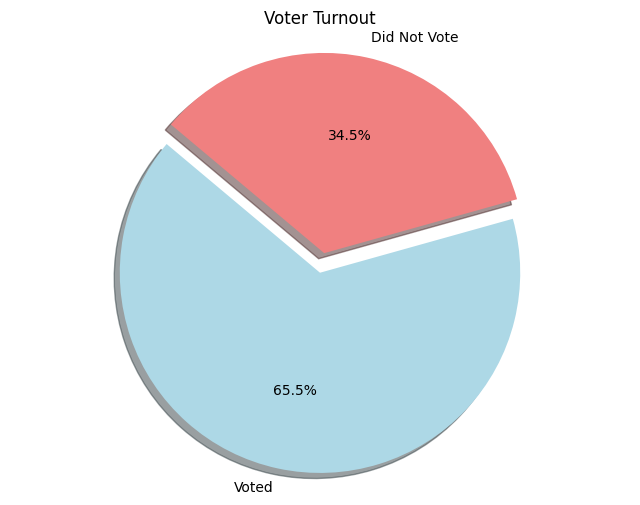

In [14]:
import matplotlib.pyplot as plt

# Example: Total number of voters and those who voted (assuming crore units)
total_voters = 98.6 * 10**7  # Total voters (converted from crore to individuals)(from internet)
voted = 64.5363445 * 10**7  # Number of voters who voted (converted from crore to individuals)

# Calculate those who did not vote
not_voted = total_voters - voted

# Ensure sizes are non-negative and valid
sizes = [voted, not_voted]

# Create a pie chart
labels = ['Voted', 'Did Not Vote']
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  # explode the 'Voted' slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Voter Turnout')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Insights 2

Top 5 voted states

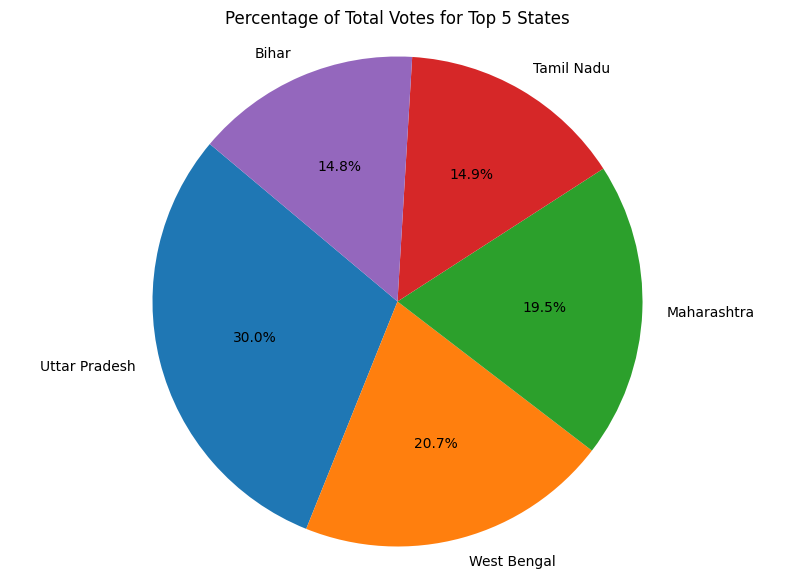

In [15]:
# Calculate total votes for each state
state_votes = df.groupby('State')['Total Votes'].sum()

# Get the top 5 states by total votes
top_5_states = state_votes.nlargest(5)

# Calculate the percentage of total votes for these top 5 states
top_5_states_percentage = (top_5_states / state_votes.sum()) * 100

# Plot the pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_5_states_percentage, labels=top_5_states_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Total Votes for Top 5 States')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Insights 3

Top 10 Candidates by Percentage of Votes

C:\python3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


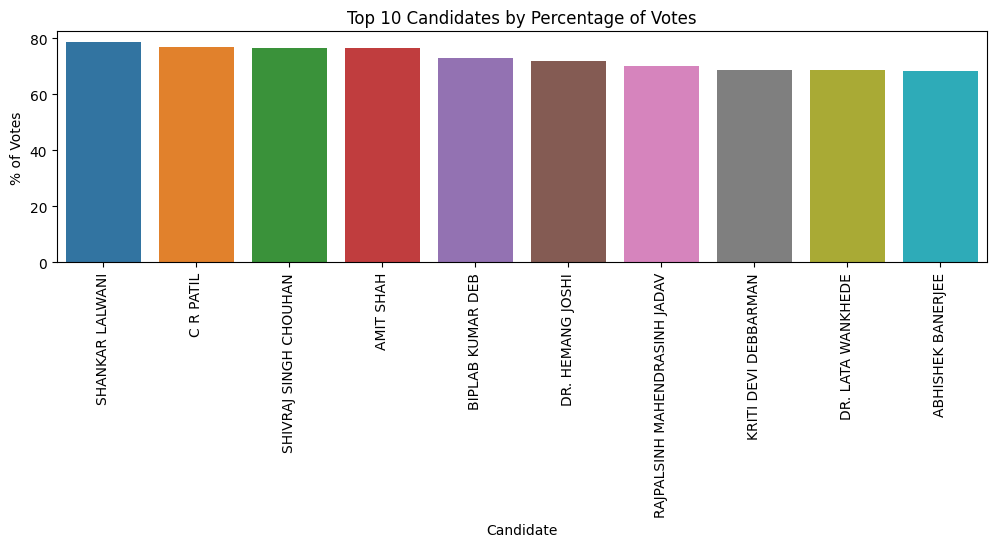

In [19]:
import seaborn as sns
top_candidates_by_percentage = df.sort_values(by='% of Votes', ascending=False).head(10)

# Visualization
plt.figure(figsize=(12,3))
sns.barplot(x='Candidate', y='% of Votes', data=top_candidates_by_percentage)
plt.xticks(rotation=90)
plt.title('Top 10 Candidates by Percentage of Votes')
plt.show()

# Insights 4

No of seats won by each party

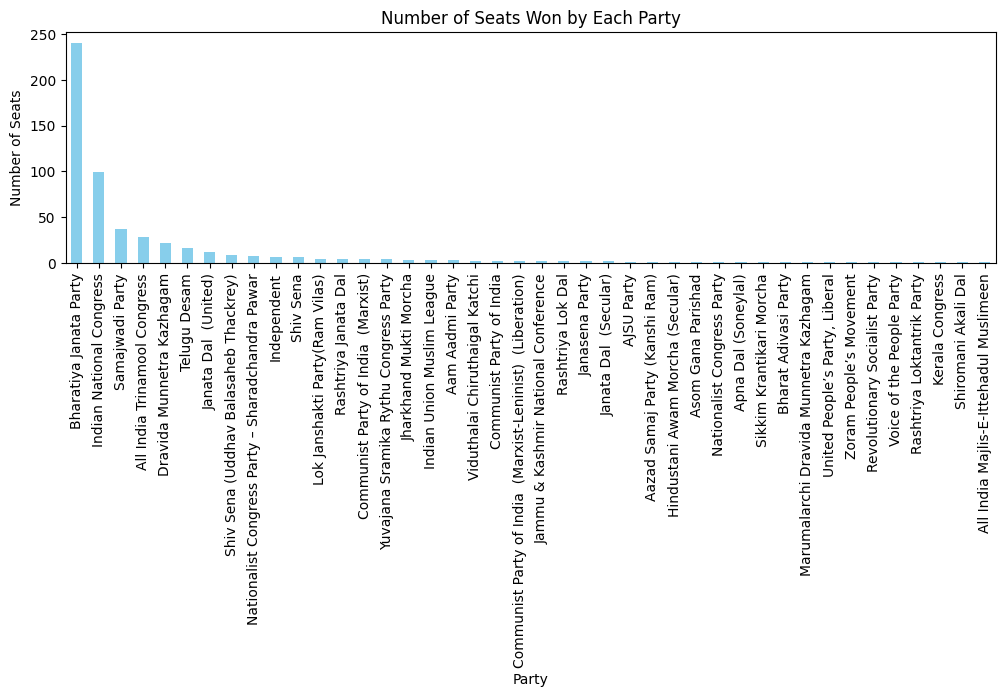

Party
Bharatiya Janata Party                                        240
Indian National Congress                                       99
Samajwadi Party                                                37
All India Trinamool Congress                                   29
Dravida Munnetra Kazhagam                                      22
Telugu Desam                                                   16
Janata Dal  (United)                                           12
Shiv Sena (Uddhav Balasaheb Thackrey)                           9
Nationalist Congress Party – Sharadchandra Pawar                8
Independent                                                     7
Shiv Sena                                                       7
Lok Janshakti Party(Ram Vilas)                                  5
Rashtriya Janata Dal                                            4
Communist Party of India  (Marxist)                             4
Yuvajana Sramika Rythu Congress Party                           4
Jhar

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
# First, find the winning candidate in each constituency
winning_candidates = df.loc[df.groupby('Constituency')['Total Votes'].idxmax()]

# Count the number of seats won by each party
seats_won_by_party = winning_candidates['Party'].value_counts()

# Plot the number of seats won by each party
plt.figure(figsize=(12, 3))
seats_won_by_party.plot(kind='bar', color='skyblue')
plt.ylabel('Number of Seats')
plt.title('Number of Seats Won by Each Party')
plt.xticks(rotation=90)  # Rotate the x-axis labels to 90 degrees
plt.show()

seats_won_by_party


# Insights 5

Determine the winning party by state

<Figure size 1800x800 with 0 Axes>

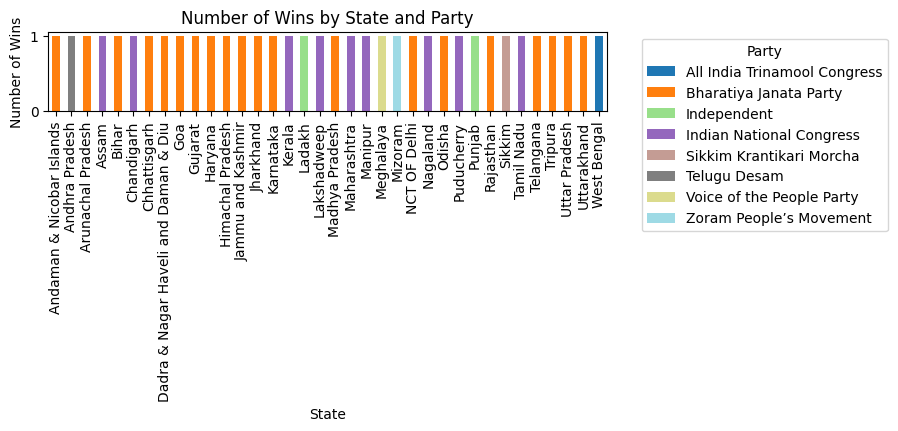

In [23]:

winning_party_by_state = df.loc[df.groupby('State')['Total Votes'].idxmax()]

# Count the number of wins by state and party
wins_by_state_party = winning_party_by_state.groupby(['State', 'Party']).size().unstack().fillna(0)

# Plot the number of wins by state and party
plt.figure(figsize=(18, 8))  # Increase the width of the graph
ax = wins_by_state_party.plot(kind='bar', stacked=True, colormap='tab20')
plt.ylabel('Number of Wins')
plt.title('Number of Wins by State and Party')
plt.xticks(rotation=90, ha='center')  # Set x-axis labels to be vertical

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.legend(title='Party', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Insights 6

Number of Constituencies Won by BJP in Each State

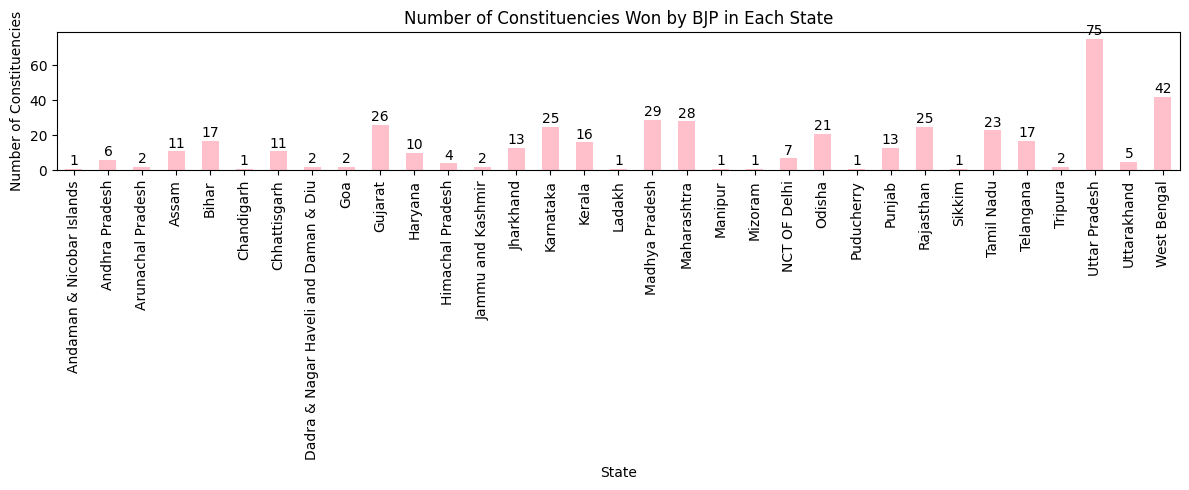

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual data loading method)
# df = pd.read_excel('path_to_your_excel_file.xlsx')
# Assuming df contains columns: State, Constituency, Party, etc.

# Example data (replace with your actual data filtering and counting)
bjp_constituencies = df[df['Party'] == 'Bharatiya Janata Party'].groupby('State')['Constituency'].count()

# Plotting
plt.figure(figsize=(12, 5))
bars = bjp_constituencies.plot(kind='bar', color='pink')
plt.title('Number of Constituencies Won by BJP in Each State')
plt.xlabel('State')
plt.ylabel('Number of Constituencies')
plt.xticks(rotation='vertical')  # Rotate state names vertically

# Annotate bars with counts
for bar, count in zip(bars.patches, bjp_constituencies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, count, ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Insights 7

Comparison of EVM votes vs postal votes

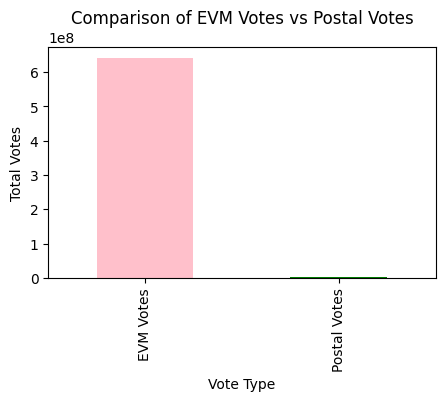

In [25]:
evm_vs_postal = df[['EVM Votes', 'Postal Votes']].sum()
plt.figure(figsize=(5, 3))
evm_vs_postal.plot(kind='bar', color=['pink', 'green'])
plt.title('Comparison of EVM Votes vs Postal Votes')
plt.xlabel('Vote Type')
plt.ylabel('Total Votes')
plt.show()

# Insights 8

total postal votes for each state

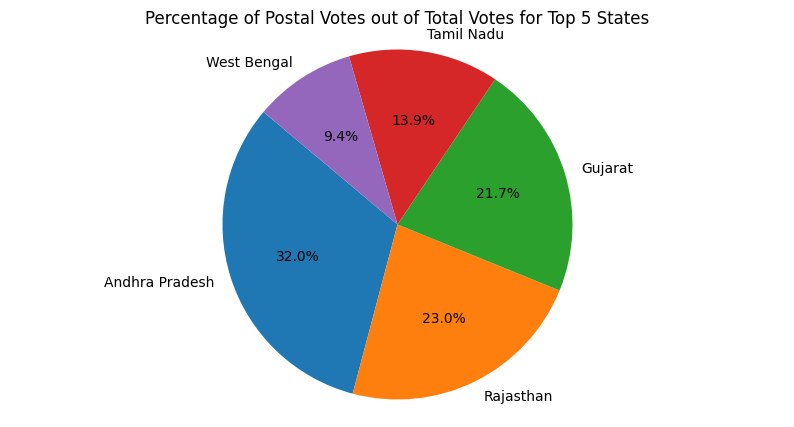

In [38]:

state_postal_votes = df.groupby('State')['Postal Votes'].sum()

# Get the top 5 states by postal votes
top_5_states_postal = state_postal_votes.nlargest(5)

# Get total votes for these top 5 states
state_total_votes = df.groupby('State')['Total Votes'].sum()
top_5_states_total_votes = state_total_votes[top_5_states_postal.index]

# Calculate the percentage of postal votes out of total votes for these states
percentage_postal_votes = (top_5_states_postal / top_5_states_total_votes) * 100

# Plot the pie chart
plt.figure(figsize=(10, 5))
plt.pie(percentage_postal_votes, labels=top_5_states_postal.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Postal Votes out of Total Votes for Top 5 States')
plt.axis('equal')
plt.show()

# Insights 9

Top 10 constituencies with highest Total Votes

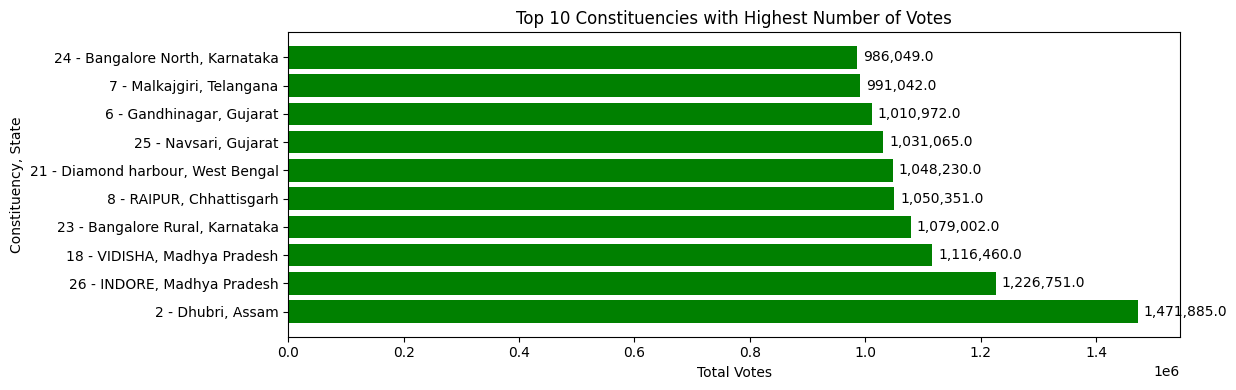

In [35]:
top_constituencies = df.nlargest(10, 'Total Votes')   

# Plotting
plt.figure(figsize=(12, 4))
bars = plt.barh(top_constituencies['Constituency'] + ', ' + top_constituencies['State'],
                top_constituencies['Total Votes'], color='green')
plt.xlabel('Total Votes')
plt.ylabel('Constituency, State')
plt.title('Top 10 Constituencies with Highest Number of Votes')
plt.tight_layout()

# Annotate bars with values
for bar, total_votes, constituency_state in zip(bars, top_constituencies['Total Votes'],
                                               top_constituencies['Constituency'] + ', ' + top_constituencies['State']):
    plt.text(bar.get_width() + 10000, bar.get_y() + bar.get_height()/2, f'{total_votes:,}', va='center')

plt.show()


# Insights 10

 constituency with the highest percentage of votes in each state

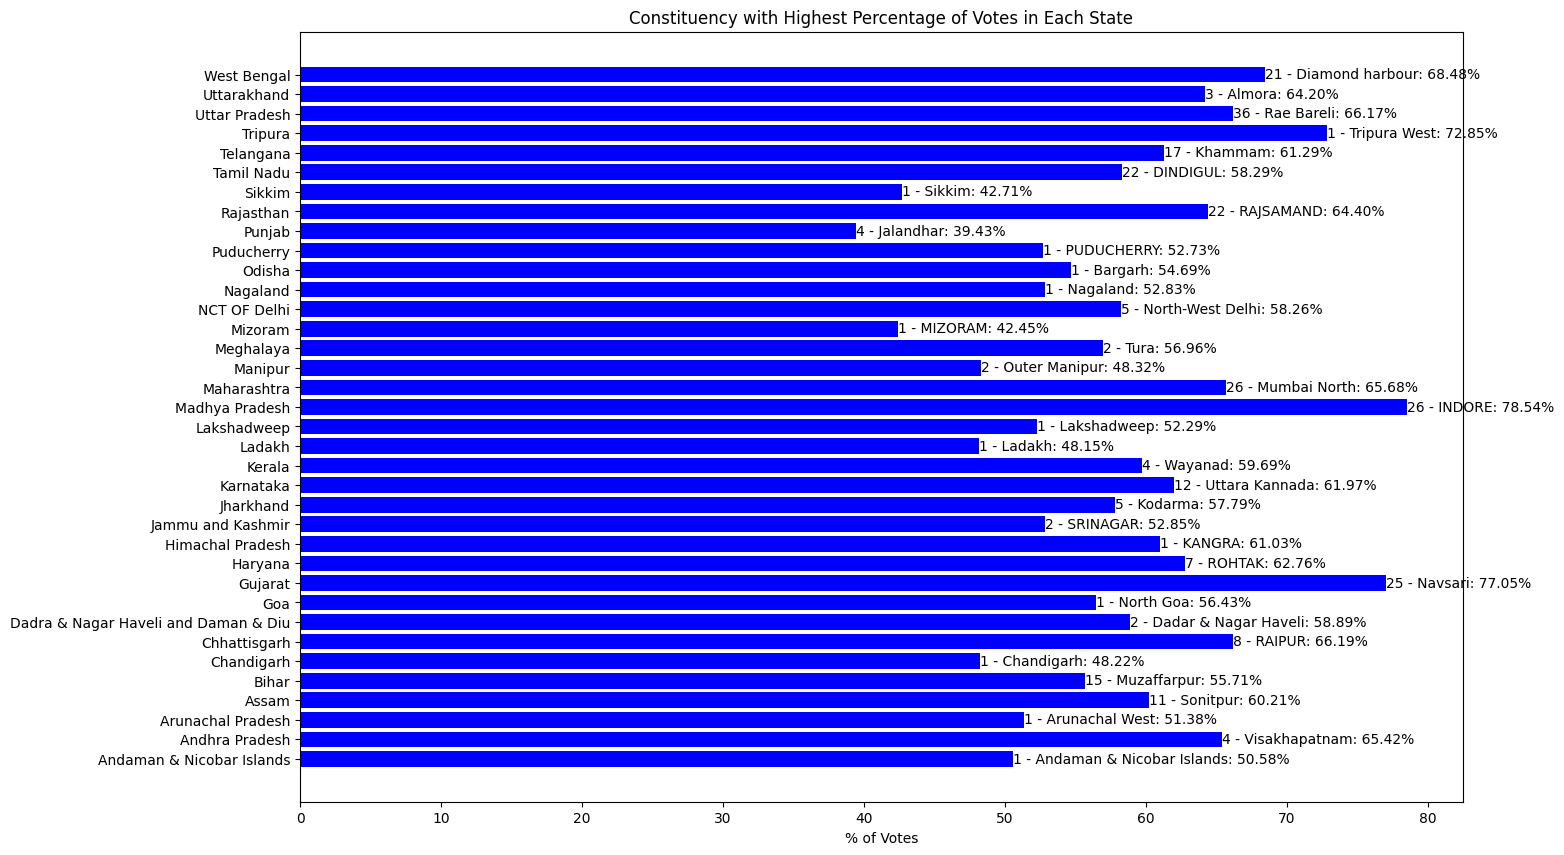

In [28]:
highest_performance = df.loc[df.groupby('State')['% of Votes'].idxmax()]

# Plotting
plt.figure(figsize=(15, 10))
plt.barh(highest_performance['State'], highest_performance['% of Votes'], color='blue')
plt.xlabel('% of Votes')
plt.title('Constituency with Highest Percentage of Votes in Each State')

for index, (value, constituency, state) in enumerate(zip(highest_performance['% of Votes'], highest_performance['Constituency'], highest_performance['State'])):
    plt.text(value, index, f'{constituency}: {value:.2f}%', va='center')

plt.show()

# Insights 11

States with worst performance of a party(in %) 

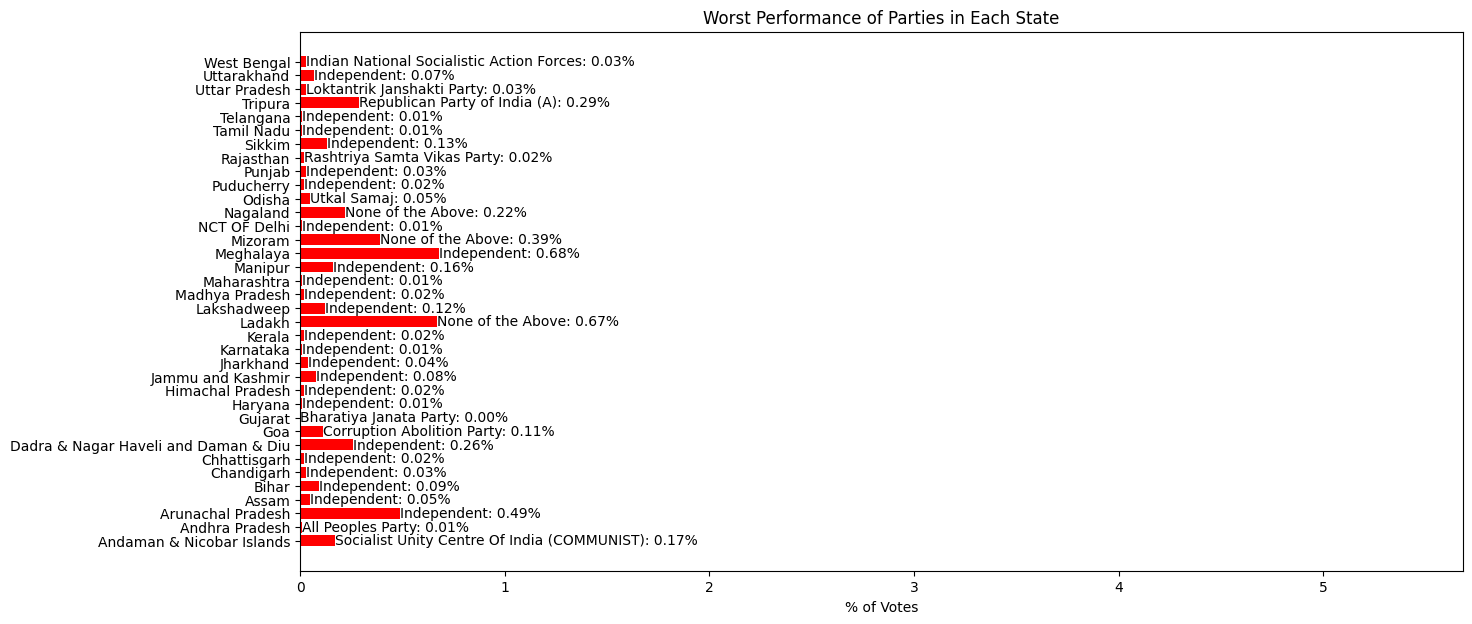

In [36]:
worst_performance = df.loc[df.groupby('State')['% of Votes'].idxmin()]

# Plotting
plt.figure(figsize=(15, 7))
plt.barh(worst_performance['State'], worst_performance['% of Votes'], color='red')
plt.xlabel('% of Votes')
plt.title('Worst Performance of Parties in Each State')
plt.xlim(0, worst_performance['% of Votes'].max() + 5)

for index, (value, party) in enumerate(zip(worst_performance['% of Votes'], worst_performance['Party'])):
    plt.text(value, index, f'{party}: {value:.2f}%', va='center')

plt.show()

# Insights 12

Calculate margin of victory

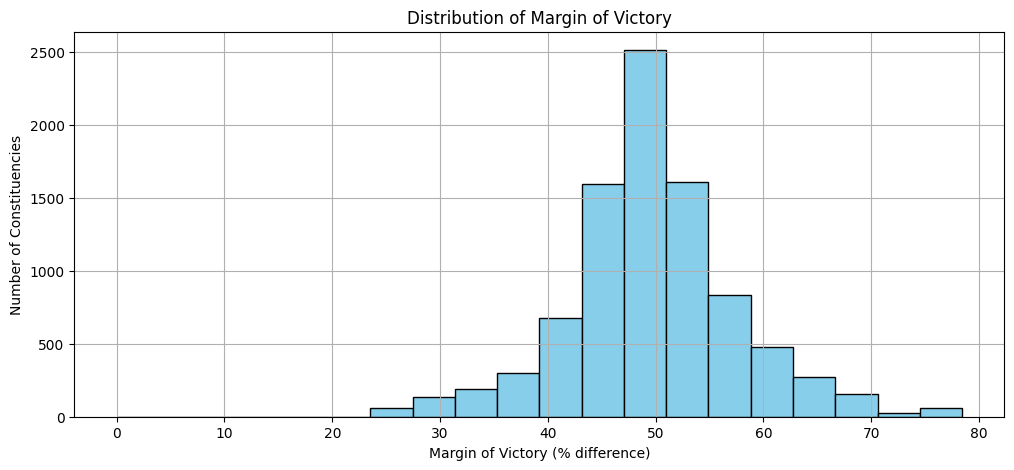

In [37]:
df['Margin of Victory'] = df.groupby('Constituency')['% of Votes'].transform(lambda x: x.max() - x.min())

# Plotting
plt.figure(figsize=(12, 5))
plt.hist(df['Margin of Victory'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Margin of Victory (% difference)')
plt.ylabel('Number of Constituencies')
plt.title('Distribution of Margin of Victory')
plt.grid(True)
plt.show()

# Insights 13

independent candidates

C:\python3.11\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\python3.11\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


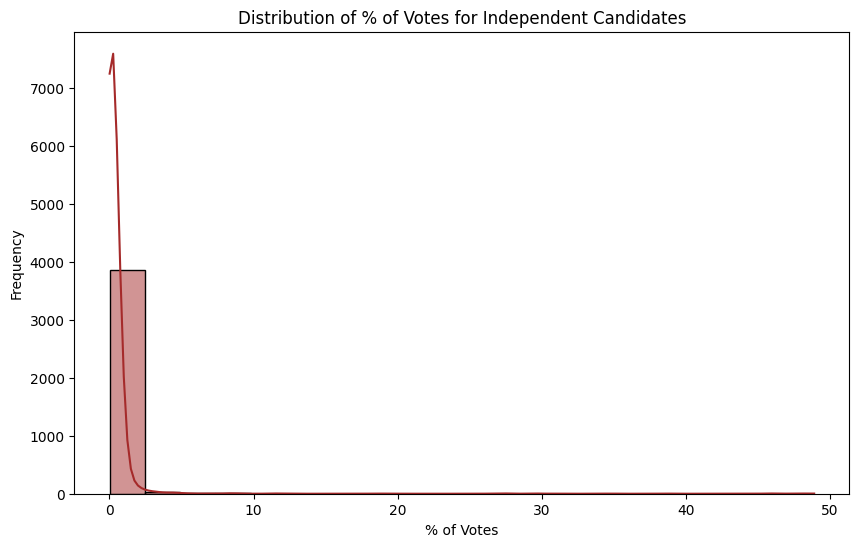

In [31]:

s